<a href="https://colab.research.google.com/github/Jesse0807/Logistic-Regression/blob/main/LinkedIn_Post_07_09_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOGISTIC REGRESSION - HEART DISEASE PREDICTION**

Data Source: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data

Let us import the libraries required for our Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("framingham.csv")

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


As there are around 400 null values in glucose column, let us replace it with mean value of the column. And similarly for other columns as well

In [ ]:
df = df.fillna(value = df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## EDA

In [ ]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

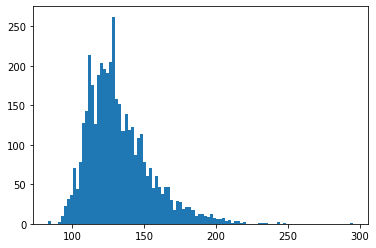

In [ ]:
plt.hist(x=df['sysBP'], bins = 100);

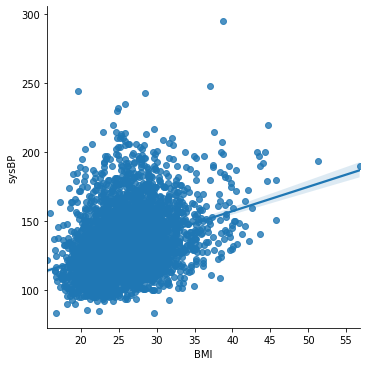

In [ ]:
sns.lmplot(data = df, x = 'BMI', y = 'sysBP')

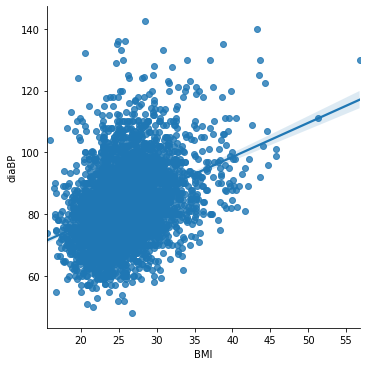

In [ ]:
sns.lmplot(data = df, x = 'BMI', y = 'diaBP')

Implies with increasing BMI, both systolic BP and Diastolic BP are increasing and are very high than normal.

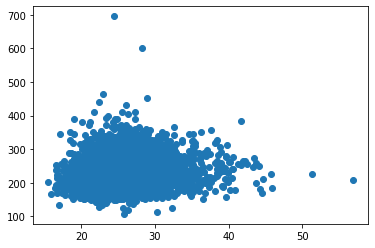

In [ ]:
plt.scatter( df['BMI'], df['totChol'])

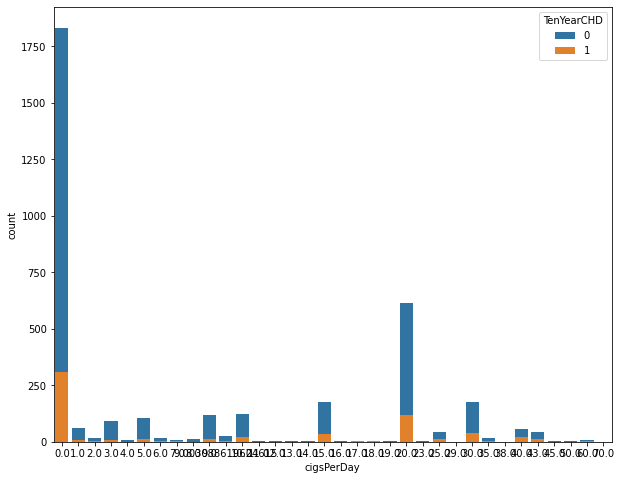

In [ ]:
plt.figure(figsize = [10,8])
sns.countplot(x= df['cigsPerDay'], hue= df['TenYearCHD'], dodge = False)

Surprisingly, there are people who smoked 60 cigarettes per day!!! 


# Model Training


In [ ]:
X= df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

Let us split the data into training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
X_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2143,0,49,2.0,1,20.0,0.0,0,0,0,283.0,127.0,86.0,23.68,95.0,78.0
254,1,51,4.0,1,15.0,0.0,0,0,0,238.0,125.0,80.0,19.36,60.0,66.0
2217,1,39,1.0,1,20.0,0.0,0,0,1,195.0,106.0,80.0,23.57,85.0,132.0
3042,0,38,4.0,1,3.0,0.0,0,0,0,177.0,126.0,80.0,23.84,90.0,79.0
2423,1,46,1.0,1,9.0,0.0,0,1,0,216.0,126.0,85.0,30.10,80.0,70.0


let us import logistic regression from Linear model library


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting Values

In [ ]:
predictions = LR.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, predictions))

[[1085   12]
 [ 168    7]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1097
           1       0.37      0.04      0.07       175

    accuracy                           0.86      1272
   macro avg       0.62      0.51      0.50      1272
weighted avg       0.80      0.86      0.81      1272



This Model has more number of false negatives (0) which is not acceptable in medical models. 